<div align="right">Python 3.6 Jupyter Notebook</div>

# Graph signal processing


<br>
<div class="alert alert-warning">
<b>Note</b>:<br> You have been provided with the code required to execute the content of this notebook. Due to the time required for installation, and the strain on the virtual analysis environment, the output has been included as static images, and you should not attempt to execute the code cells.
</div>

# Notebook introduction

The video content highlighted the importance of understanding graphs as data representation objects that can capture and describe relationships between data entities. Applications of graphs extend across numerous network types, including transportation, geographical, and social networks. The weight associated with each edge in the graph often represents the similarity between the two vertices it connects, or the strength of such a relationship. 

The earlier notebooks in this module demonstrated how to explore and exploit edge structure (connectedness) properties in order to understand the structure of the graphs. You were then able to use this knowledge in clustering, and the identification of communities in graphs (using graph partitioning algorithms). Besides the information about the relationship between connected components, there is an ever-increasing amount of information about the components themselves as a result of big data. Therefore, a field of research and application (**graph signal processing**), which is based on a simple model for graph-structured data (a **graph signal**), is emerging.

The data on these graphs can be visualized as a finite collection of samples, with one sample at each vertex in the graph, and each such sample described by a scalar value. The collection of these scalar samples, defined on each vertex of a graph, is referred to as a **graph signal**. The [figure](https://arxiv.org/pdf/1211.0053v2.pdf) below shows an example of a graph signal, where each bar represents a random positive value generated on the vertices of a Petersen graph (Shuman et al. 2013). Thus, the relational structure is now paired with measurements on the nodes of the network.

![Petersen graph signal](img/petersen_graph_signal.png "Petersen graph signal.")

**`Graph signal processing`** can be considered a generalization of the classical signal processing framework in the graph spectral domain. As discussed in the video content, just as the frequency-based domain representation of a signal decomposes a signal into harmonics of varying frequencies, so too does graph signal processing demonstrate how fast a graph signal changes with respect to graph topology. For example, this can be used in tracking the shifts of personal preferences between friends in a social network. 

In graph signal processing, the **`graph Laplacian matrix`** is the core operator. The spectral decomposition of this matrix results in **eigenspaces**. This approach is similar to the use of sinusoidal functions in classical frequency analysis. Graph-based signal processing can be used in compression, denoising, interpolation, and many other applications. 

Example applications of graph signal processing include the following:
- **Sensor networks:** This is in terms of the relative positions of sensors, and temperature. Does temperature vary smoothly?
- **Social network analysis:** This analysis can be done on aspects such as friendship, relationship, and age. Are friends of similar ages?
- **Image processing:** This is in terms of pixel positions and similarity, pixel values, discontinuities, and smoothness.
- **Mobility inference:** This inference can enable an understanding of people’s behaviors, while simultaneously protecting their privacy.

Next, this notebook will demonstrate simple filtering applications based on graph signal processing. **`This material is primarily for review purposes only. A good mathematical foundation in linear algebra and calculus is required for a more thorough treatment of this topic`**.

# 1. Generic example of graph signal processing 

#### Load libraries

In [1]:
%matplotlib inline
import matplotlib
import pygsp
from pygsp import graphs, plotting
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd

plt.rcParams['figure.figsize'] = (6, 6)

First, simple filtering on a noisy graph signal will be demonstrated. This is based on an example in an article by Nathanael Perraudin et al. (2016) titled "[GSPBOX: A toolbox for signal processing on graphs](http://arxiv.org/pdf/1408.5781.pdf)".

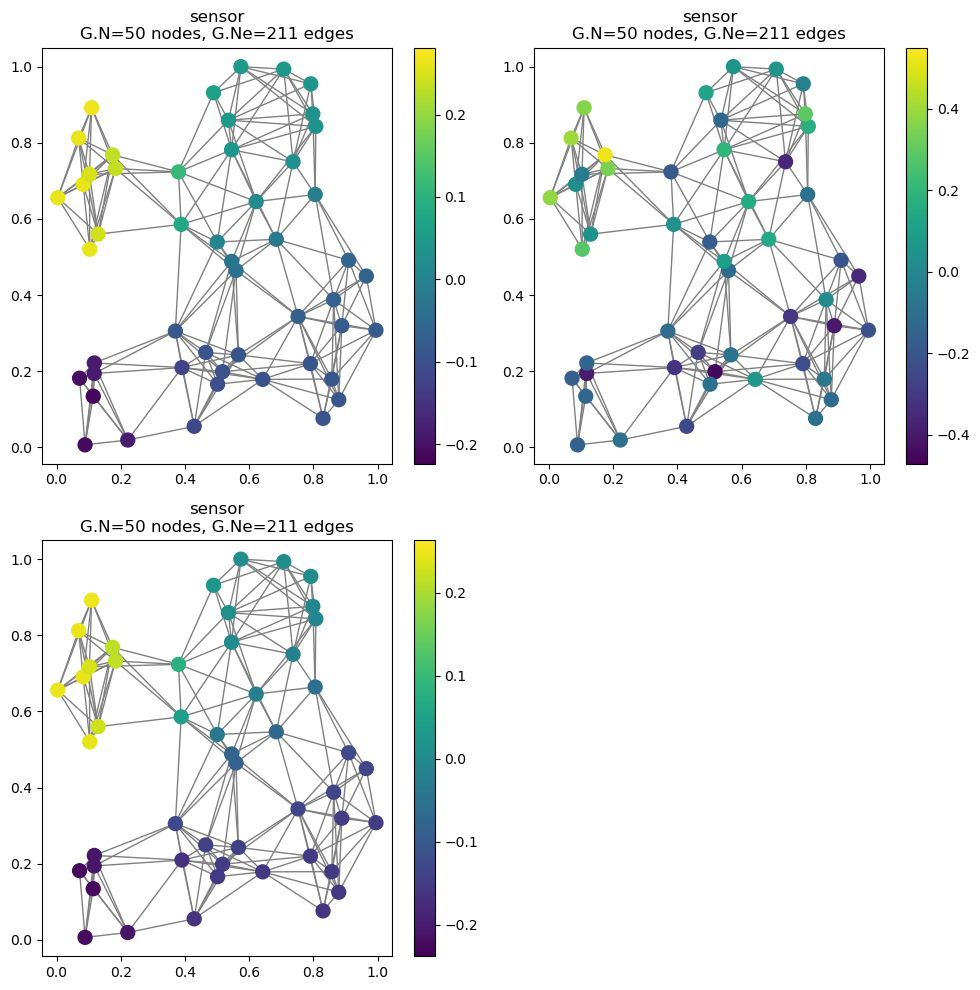

In [2]:
# Create a graph.
N = 50  # number of nodes.
G = pygsp.graphs.Sensor(N)
## Compute the Fourier basis.
G.compute_fourier_basis()

# Create a smooth signal with noise.
# The second Eigenvector of the Laplacian matrix, often called the Fiedler vector, 
# can be considered as a smooth graph signal.
x = G.U[:, 1]

y = x + np.random.normal(scale=1/np.sqrt(N), size=N)

# Select a filter
filter = pygsp.filters.Expwin(G, 0.1)

# Filter the noise
s = filter.analyze(y)

# Plot settings
fig = plt.figure(figsize=(10, 10))

# Create subplots
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0))

# Plot the original signal
ax1.set_title('Original Signal')
G.plot_signal(x, ax=ax1)

# Plot noisy signal
ax2.set_title('Noisy Signal')
G.plot_signal(y, ax=ax2)

# Plot filtered signal
ax3.set_title('Filtered Signal')
G.plot_signal(s, ax=ax3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
#eliminate G.n and G.Ne
#call and sms reproduce the same network
#loss function
#local to cloud 

## 2. References

1. Perraudin, Nathanael, Johan Paratte, David Shuman, Lionel Martin, Vassilis Kalofolias, Pierre Vandergheynst, and David K. Hammond. 2016. “GSPBOX: A tool for signal processing on graphs.” arXiv eprint arXiv:1408.5781v2.

2. Shuman, David I., Sunil K. Narang, Pascal Frossard, Antonio Ortega, and Pierre Vandergheynst. 2013. “The Emerging Field of Signal Processing on Graphs: Extending High-Dimensional Data Analysis to Networks and Other Irregular Domains.” arXiv eprint arXiv:1211.0053v2. doi:10.1109/MSP.2012.2235192.
